In [2]:
#from serial import Serial
import serial
import numpy as np
from matplotlib import pyplot as plt
from time import time


In [3]:
ser=serial.Serial('COM3', 9600)


In [9]:
ser.close()

In [4]:

# set plot to animated
plt.ion() 

start_time = time()
timepoints = []
ydata = []
yrange = [-0.1,1.1]
view_time = 4 # seconds of data to view at once
duration = 24 # total seconds to collect data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


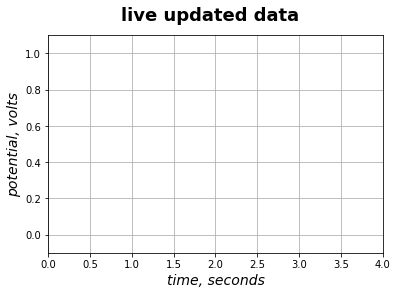

In [5]:
fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

# flush any junk left in the serial buffer
ser.flushInput()
#ser.reset_input_buffer() # for pyserial 3.0+
run = True






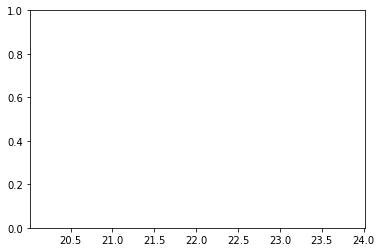

In [6]:
# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    data = ser.readline()#.split(' ')
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        ydata.append(float(data[0])*5.0/1024)
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig1.canvas.draw()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


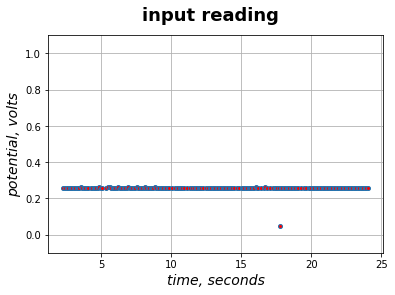

In [8]:
# plot all of the data you collected
fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('input reading', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig2.show()
